In [1]:
import autoencoder.adversarial as aae
import autoencoder.utils as utils 
import autoencoder.cluster_layer as clay

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline


/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
esize = [(64,3), (128, 3)] #, (256,3)]
dsize = list(reversed(esize))

params =dict()

params['nclusters'] = 10
params['width'] = 28
params['height'] = 28
params['nchannels'] = 1
params['channels'] = [0]
params['nepochs'] = 20
params['batchsize'] = 256
params['learning_rate'] = 0.0005
params['restore'] = False
params['latent_size'] = 16
params['enc_sizes'] = esize 
params['dec_sizes'] = dsize
params['droprate'] = 0.85
params['stdev'] = 0.04
params['denoise'] = False
params['slam'] = 0

datadir = "/media/cjw/Data/MNIST/"
cpf = "/media/cjw/Data/cyto/Checkpoints/2018-09-11-19-08-58_idec_mnist/"
cpf += "checkpoint-2018-09-11-19-08-58/autoencoder-16x-40000"
cpd = ""

In [3]:
rl = aae.aae_loader(params, datadir, cpf, cpd)

In [ ]:
rl.load()


Encoder True
Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32) (?, 28, 28, 1)
isize:  7 28
dh0 (?, 28, 28, 1)
[<tf.Variable 'encoder/filter_00/kernel:0' shape=(3, 3, 1, 64) dtype=float32_ref>, <tf.Variable 'encoder/filter_00/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/kernel:0' shape=(6272, 16) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder/dense/kernel:0' shape=(16, 6272) dtype=float32_ref>, <tf.Variable 'decoder/dense/bias:0' shape=(6272,) dtype=float32_ref>, <tf.Variable 'decoder/conv2d_transpose/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'decoder/conv2d_transpose/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'decoder/decoder_out/kernel:0' shape=(5, 5, 1, 64) dtype=float32_ref>, <tf.Variabl

(12000, 28, 28, 1)
DBSCAN(algorithm='auto', eps=1.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)
N cores 23
original clusters
[11916     0     8     0     0     5     0    34     0     0    10     0
     5     0     0     5     0     6     0     0     6     0     5]


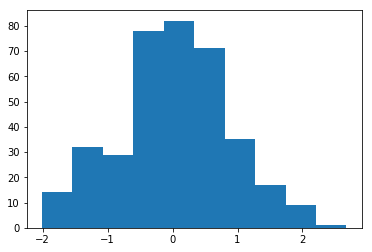

building cluster layer (?, 16)
after input_spec
23 16 <class 'int'> float32
(23, 16)
(23, 16)
done building
CALL  (?, 23) (?, 1, 16)
0 14.515156 9.65176
[  87 1406  281  233  689   16  700 1215  110   16  520  536  370   13
  200 1256   87  265   17  942 1951  330  760]
1.0
1000 7.820619 7.6548195
[   2 3092  299    2    1    0  257   88    0    0  235    3    3    0
    0  810    1    6    0    2  308 6859   32]
0.8119166666666666
2000 7.883321 7.769598
[   3 3335  208    0    1    0  180   45    0    0  209    2    1    0
    0  713    1    5    0    3  267 6999   28]
0.15016666666666667
3000 8.002916 7.9058237
[   1 3776  157    0    1    0   96   39    0    0  190    0    1    0
    0  581    1    5    0    3  207 6919   23]
0.13633333333333333
4000 7.5818076 7.4979615
[   1 4296  116    0    1    0   62   26    0    0  130    0    1    0
    0  465    0    4    0    2  220 6654   22]
0.12858333333333333
5000 7.533778 7.4512844
[   2 4489   95    0    1    0   50   25    0    0  12

In [ ]:
cluster = clay.cluster_train(rl)

In [6]:
b = utils.get_sample(rl.mmdict, rl.df, 4000, 28, 1, [0])

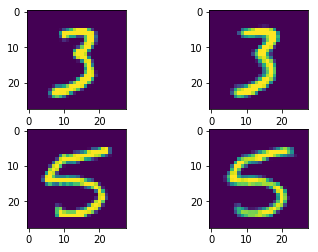

In [7]:
z = rl.encoder.eval({rl.images:b}, session=rl.sess)
dc = rl.decoder.eval({rl.encoder:z}, session=rl.sess)

index = 0
c = 0
dr = np.squeeze(dc[index,:,:,c])
plt.subplot(2,2,1)
plt.imshow(b[index,:,:,c])
plt.subplot(2,2,2)
plt.imshow(dr)

dr = np.squeeze(dc[index + 1,:,:,c])
plt.subplot(2,2,3)
plt.imshow(b[index + 1,:,:,c])
plt.subplot(2,2,4)
plt.imshow(dr)

In [8]:
import numpy as np
res = cluster.eval({rl.images:b}, session = rl.sess)


In [32]:
n19 = (np.argmax(res, axis=1) == 9)
ni = np.where(n19)[0]
print(len(ni))

449


11


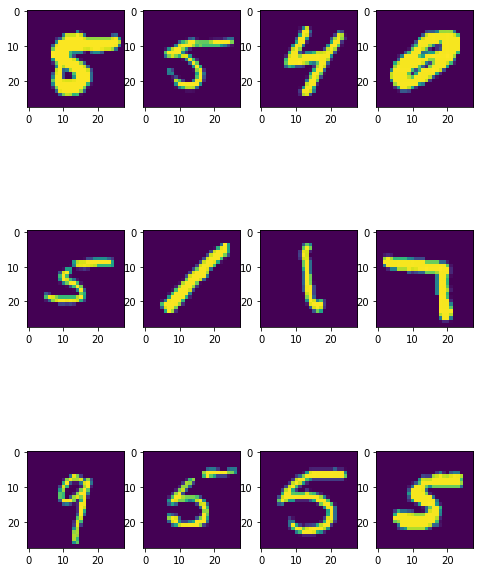

In [33]:
nr = len(ni)
if nr > 12:
    nr = 12
nc = 1
plt.figure(figsize=(8,nr*4))
for ie, i in enumerate(ni):
    #print(i)
    plt.subplot(nr,4,nc)
    nc +=1
    plt.imshow(b[i,:,:,0])
    
    if ie >= 11:
        print(ie)
        break
    
    
    

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        7.000e+00, 5.000e+00, 1.500e+01, 2.600e+01, 6.000e+01, 9.200e+01,
        1.440e+02, 2.720e+02, 4.060e+02, 5.880e+02, 7.200e+02, 8.610e+02,
        1.056e+03, 1.161e+03, 1.303e+03, 1.524e+03, 2.082e+03, 2.818e+03,
        4.097e+03, 4.967e+03, 4.699e+03, 3.680e+03, 2.802e+03, 2.037e+03,
        1.490e+03, 9.870e+02, 7.200e+02, 4.690e+02, 2.630e+02, 1.950e+02,
        1.400e+02, 9.000e+01, 5.400e+01, 3.900e+01, 3.600e+01, 2.600e+01,
        1.200e+01, 1.600e+01, 9.000e+00, 1.100e+01, 2.000e+00, 3.000e+00,
        4.000e+00, 4.000e+00]),
 array([0.08347609, 0.08413307, 0.08479006, 0.08544704, 0.08610402,
        0.08676101, 0.08741799, 0.08807497, 0.08873195, 0.08938894,
        0.09004592, 0.0907029 , 0.09135989, 0.09201687, 0.09267385,
        0.09333084, 0.09398782, 0.0946448 , 0.09530179, 0.09595877,
        0.09661575, 0.09727274, 0.09792972, 0.0985867 , 0.09924369,
        0.09990067, 0.10055765, 0.10

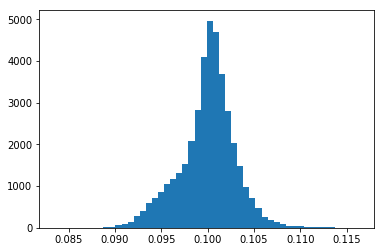

In [15]:
plt.hist(np.reshape(res, (-1)), bins=50)

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(2, 30).fit_transform(z)

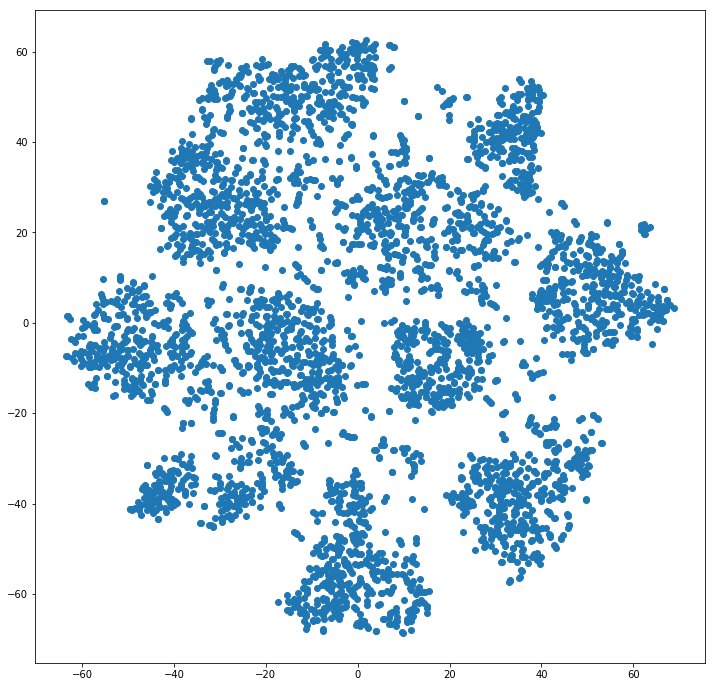

In [17]:
plt.figure(figsize=(12,12))
plt.scatter(tsne[:,0], tsne[:,1])

In [ ]:
np.linalg.norm(np.array([1,2,-3]), ord=2, axis=0)
#qv

In [ ]:
from scipy.spatial.distance import euclidean
wgh = rl.sess.run(cluster.weights)
wgh = wgh[0]

for p in z:
    print(np.linalg.norm(wgh[16] - p, ord=2))


In [ ]:
from scipy.signal import convolve

zi = np.copy(z[index:index+2])
#zi = np.expand_dims(zi, 0)
zi = -zi[0]# + zi[1]
#zi = convolve(zi, np.array([1])/1, mode='same')
#zi[np.abs(zi) < .5] *= 0
rx = np.random.randint(0, 256, 10)
#zi[rx] = 10
#zi = np.sum(zi, axis=0)/2
zi = np.expand_dims(zi, 0)
plt.plot(zi[0])
zi.shape

In [ ]:
di = rl.decoder.eval({rl.encoder:zi}, session=rl.sess)
plt.imshow(np.squeeze(di[0,:,:,0]))